# EDA

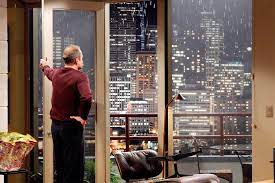

In [1066]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno #new, add to requirements.txt

from datetime import datetime, date, time #new, add to requirements.txt
from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [1067]:
#read in the data file
df = pd.read_csv('./data/King_County_House_prices_dataset.csv')
# as column 'condition' is truncated in the display, disable column truncation
#df = pd.set_option('display.max_columns', 60) 
#df = pd.set_option('display.width', None) 
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,3,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [1068]:
#have a look at how many rows and columns
df.shape


(21597, 21)

In [1069]:
#which data types?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [1070]:
#results:
#date is an object, has to be a datetime variable for further calculations
#floors could also be an int
#waterfront? why is it a float? has some NaN values (around 2000)
#view, we said it's Aussicht, why is it a float? have a closer look at the values
#condition: what are the values?
#grade: what are the values?
#sqft_basement: is an object, should be an int
#year built: int, not datetime, correct?
#yr_renovated: should be an int, no float, a lot of NaN
#lat: maybe throw out
#long: maybe throw out
#sqft_living - maybe throw out
#sqft_lot15 - maybe throw out

In [1071]:
#first overview of descriptive statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


In [1072]:
#checking for duplicates
df.duplicated().value_counts()
#there are no duplicates

False    21597
dtype: int64

In [1073]:
#display the number of missing values per column
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
                ..
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
Length: 21, dtype: int64

<AxesSubplot:>

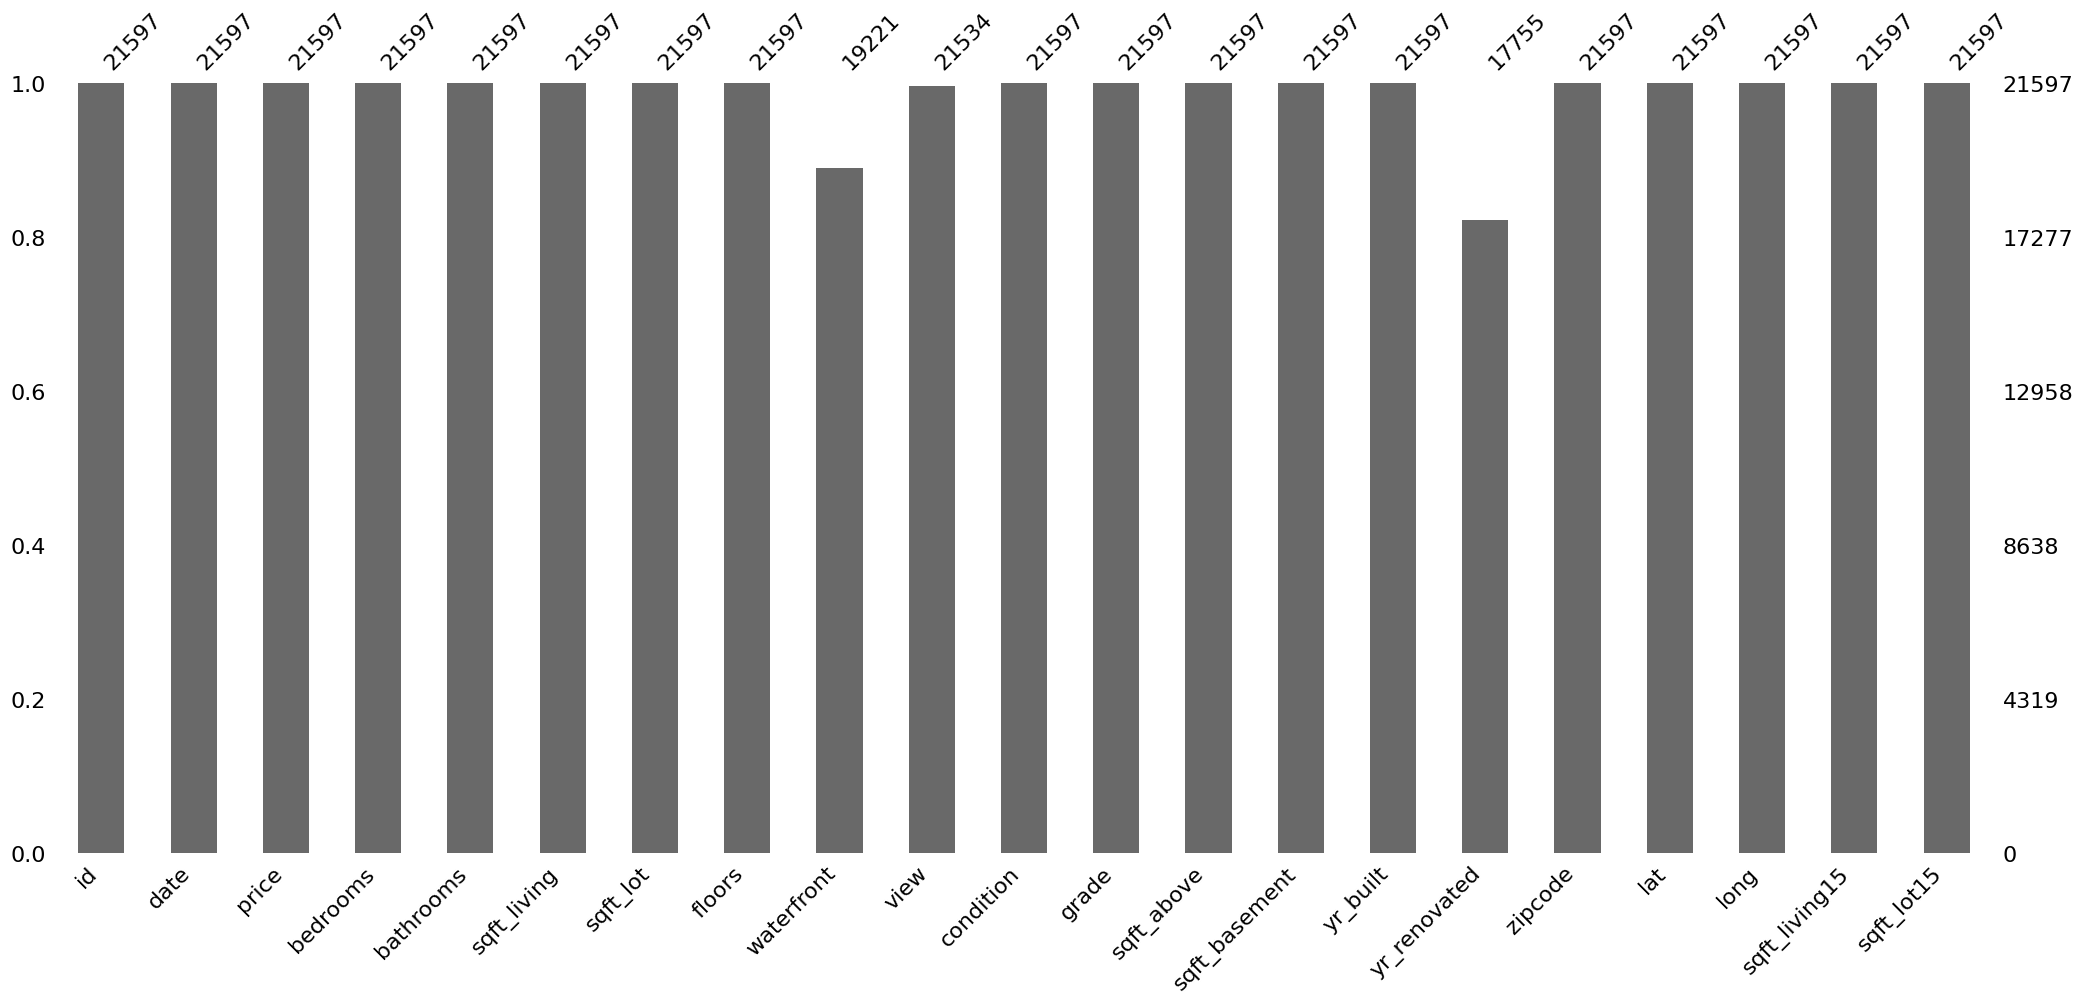

In [1074]:
msno.bar(df)

# changing data types and explore some variables

### date

In [1075]:
#change variable type of date for further calculations
df['date'] = pd.to_datetime(df['date'])
df.date.dtypes

dtype('<M8[ns]')

In [1076]:
df.date.describe()

count                   21597
unique                    372
top       2014-06-23 00:00:00
freq                      142
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: date, dtype: object

In [1077]:
df.date.value_counts().head(20)


2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2015-04-27    126
2015-03-25    123
2014-07-09    121
2015-04-14    121
2015-04-28    121
2015-04-22    121
2014-06-24    119
2015-04-21    119
2014-08-26    117
2014-10-28    117
2014-07-14    116
2014-05-20    116
2014-07-01    115
2014-08-20    114
2014-06-17    113
2015-04-29    113
Name: date, dtype: int64

### floor

In [1078]:
df['floors'].value_counts()
#there seem to be 'half floors, so I don't change the type float to int


1.000    10673
2.000     8235
1.500     1910
3.000      611
2.500      161
3.500        7
Name: floors, dtype: int64

### waterfront

In [1079]:
df['waterfront'].value_counts()
#only 146 houses were waterfronted, so I don't use the variable 
#for further calculation

0.000    19075
1.000      146
Name: waterfront, dtype: int64

<AxesSubplot:ylabel='Frequency'>

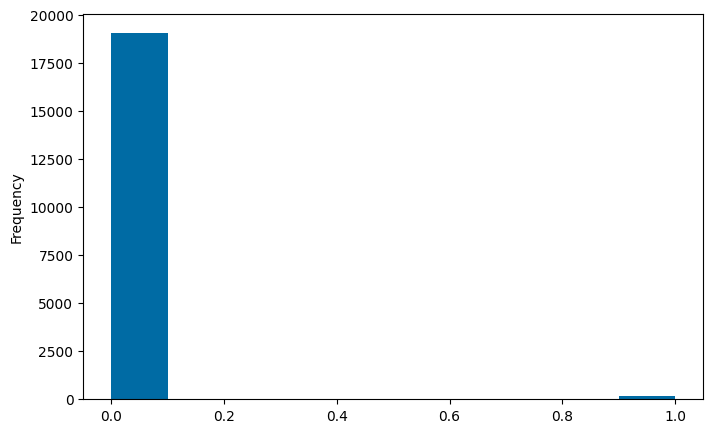

In [1080]:
df['waterfront'].value_counts()
#seems that 0 stands for "no waterfront" and 1 for "waterfront"
#maybe change later to "yes" and "no" and string type
#only very few houses (146) have a front to a waterfront
#more than 2000 values are missing
df.waterfront.plot(kind='hist')


### view

In [1081]:
df.view.value_counts()

#most of the values are 0; will not use it for now

0.000    19422
2.000      957
3.000      508
1.000      330
4.000      317
Name: view, dtype: int64

In [1082]:
#how many values are 0.000 of view?
(19422 / 21500) * 100

90.33488372093024

<AxesSubplot:ylabel='Frequency'>

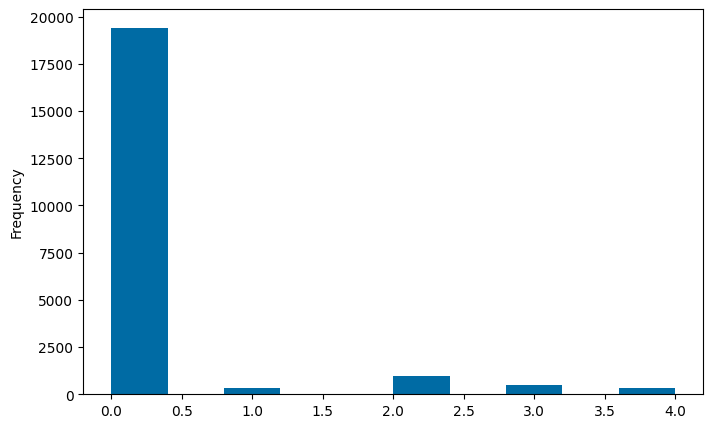

In [1083]:
df.view.plot(kind='hist')

### condition

In [1084]:
df['condition'].value_counts()


3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

<AxesSubplot:ylabel='Frequency'>

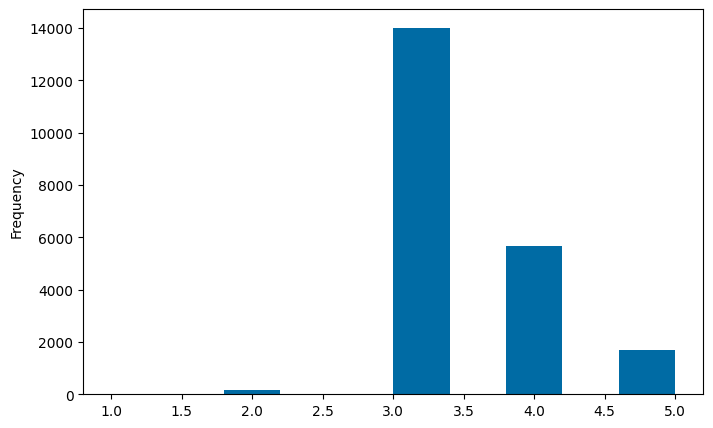

In [1085]:
df['condition'].plot(kind='hist')
#most of the houses were in a middle range of condition
#1st is worst, 5th is best

### grade

In [1086]:
df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

<AxesSubplot:ylabel='Frequency'>

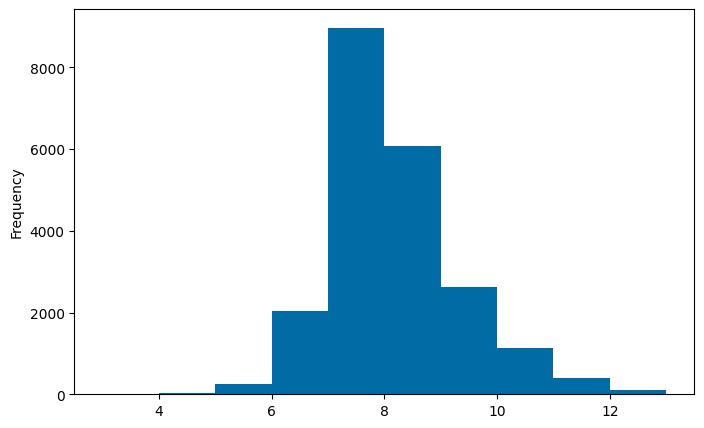

In [1087]:
df.grade.plot(kind='hist')

* the values of the grade lie between 3 and 13, 3rd is worst, 13th is best
* most of the houses have been rated with a grade of 7 (41.55%) or 8 (28.08%)
* around 20 % have a good until very good range (maybe create a new column with bins)

In [1088]:
#grade 7 in %:
grade7 = round((8974 / 21597) * 100, 2)
print(f'grade 7: ', grade7)

#grade 8 in %:
grade8 = round((6065 / 21597) * 100, 2)
print(f'grade 8: ', grade8)

#grade 9 until 13 in %:
grade9_13 = round(((2615 + 1134 + 399 + 89 + 13) / 21597) * 100, 2)
print(f'grade 9 until 13: ', grade9_13)

grade 7:  41.55
grade 8:  28.08
grade 9 until 13:  19.68


### yr_built

In [1089]:
df['yr_built'].describe()

count   21597.000
mean     1971.000
std        29.375
min      1900.000
25%      1951.000
50%      1975.000
75%      1997.000
max      2015.000
Name: yr_built, dtype: float64

In [1090]:
df['yr_built'] = df['yr_built'].astype(int)
df.yr_built


0        1955
1        1951
2        1933
3        1965
4        1987
         ... 
21592    2009
21593    2014
21594    2009
21595    2004
21596    2008
Name: yr_built, Length: 21597, dtype: int64

<AxesSubplot:>

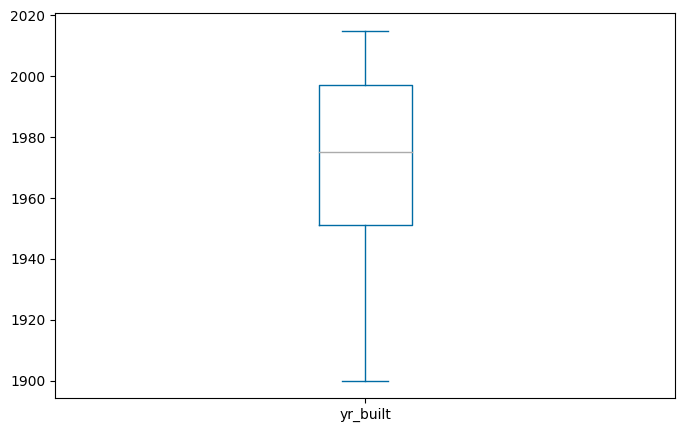

In [1091]:
df['yr_built'].plot(kind='box')

* most of the buildings have been built in the 70's (mean 1971, median 1975)
* 50 % of the buildings have been built between 1951 and 1997 (IQR)
* the oldest building is from 1900
* the newest 25 % were built between 1998 and 2015

### yr_renovated

In [1092]:
df['yr_renovated'].describe()

count   17755.000
mean       83.637
std       399.946
min         0.000
25%         0.000
50%         0.000
75%         0.000
max      2015.000
Name: yr_renovated, dtype: float64

In [1093]:
#df.sort_values('yr_renovated').head(50)
#it seems, that there are a lot of missing values and a lot of zeros instead of a year

In [1094]:
#df['yr_renovated'] = df['yr_renovated'].astype(int)
df.yr_renovated
#not possible because of the high amount of NaN, maybe 
#replace the 0 with nan(look at the picture of Jan)

0          0.000
1       1991.000
2            NaN
3          0.000
4          0.000
          ...   
21592      0.000
21593      0.000
21594      0.000
21595      0.000
21596      0.000
Name: yr_renovated, Length: 21597, dtype: float64

In [1095]:
df.yr_renovated.value_counts()

0.000       17011
2014.000       73
2013.000       31
2003.000       31
2007.000       30
            ...  
1951.000        1
1953.000        1
1946.000        1
1976.000        1
1948.000        1
Name: yr_renovated, Length: 70, dtype: int64

In [1096]:
df['yr_renovated'].isna().sum()

3842

In [1097]:
21597 - (3842+17011)

744

with 3842 missing values and 17011 rows, where the "year" is zero, we only have values for 744 houses. 
Therefore I won't use the column for further calculation.

### zipcode

In [1098]:
df['zipcode'].nunique()
#there exists 70 different zipcodes
#for deciding, which of them are "central", I have to do research in Google and create a new column by google
df.zipcode.value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [1099]:
df['zipcode_centered']= df.zipcode.isin([98001, 98002, 98071, 98092, 98004, 98005, 98006, 98007, 98008, 98009,\
                                            98015, 98003, 98023, 98063, 98093, 98030,98031, 98032, 98035, 98042,\
                                            98064, 98089, 98033, 98034, 98083, 98052, 98053, 98073, 98055, 98056,\
                                            98057, 98058, 98059, 98101, 98102, 98103, 98104, 98112, 98122])
df.zipcode_centered.value_counts()

False    12483
True      9114
Name: zipcode_centered, dtype: int64

In [1100]:
df.shape

(21597, 22)

In [1101]:
#percentage of central zipcodes
9114/21597 * 100

42.20030559799972

# price variable

In [1102]:
#price
df.price.describe()

count     21597.000
mean     540296.574
std      367368.140
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64

<AxesSubplot:>

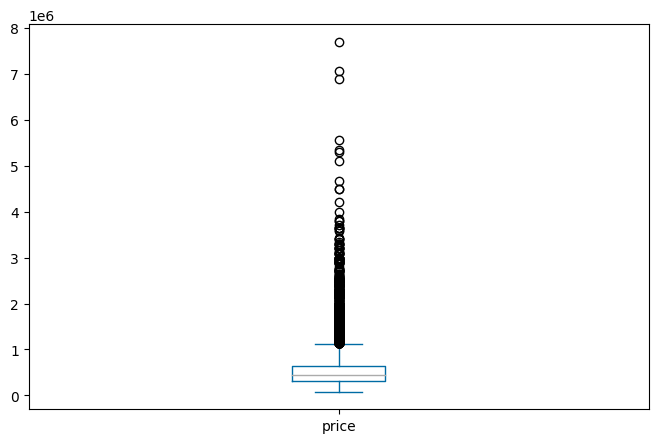

In [1103]:
df['price'].plot(kind='box')
#the price of the houses vary a lot, there are many outliers
#the task is to find out, which variables affects the price the most

In [1104]:
#df.drop([15856], inplace=True), I won't drop the house with 33 bedrooms, because it doesn't affect my hypothesis
#regarding the price and the size, it's not that expensive for 33 bedrooms
#df = pd.set_option('display.max_rows', 20)
df[['price','bedrooms']].sort_values(by='bedrooms', ascending=False)

,price,bedrooms
15856,640000.000,33
8748,520000.000,11
13301,1150000.000,10
19239,660000.000,10
15147,650000.000,10
...,...,...
12472,238000.000,1
13316,248000.000,1
7010,400000.000,1
3578,355000.000,1


In [1105]:
#pd.set_option("max_rows", 60)
#q = df["price"].quantile(0.90)
#df[df["price"] < q]
#df.query('price ')
#df['price'].plot(kind='box')

### H1: Houses in a central area are more expensive than outside a central area.


In [1106]:
df_grouped_central = df.groupby('zipcode_centered').mean().reset_index()
df_grouped_central

,zipcode_centered,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,4523017904.133,537521.811,3.294,2.064,2025.416,16456.340,1.492,0.010,0.289,3.382,7.576,1718.993,1967.424,99.246,98101.987,47.589,-122.224,1926.918,13797.066
1,True,4659169486.033,544097.030,3.481,2.187,2155.524,13240.886,1.497,0.004,0.158,3.448,7.771,1883.930,1975.898,62.210,98045.032,47.520,-122.200,2068.391,11335.513


In [1130]:
# # df_grouped_central['zipcode_centered'].astype(str)
# df_grouped_central['zipcode_centered'] = df_grouped_central['zipcode_centered'].replace(['True', 'False'], ['yes', 'no']) #inplace=True)
# df_grouped_central
#can't change False and True to yes and no, maybe ask coaches

In [1108]:
# plt.style.use('tableau-colorblind10')
# plt.figure()
# plt.bar(df_grouped_central['zipcode_centered'], df_grouped_central['price'])
# #plt.xticks(['0.000', '1.000'])
# plt.title("Mean price by central 'yes' oder 'no'")
# plt.xlabel('central')
# plt.ylabel('mean price in ')
# plt.show()

[Text(0, 0, '537522'), Text(0, 0, '544097')]

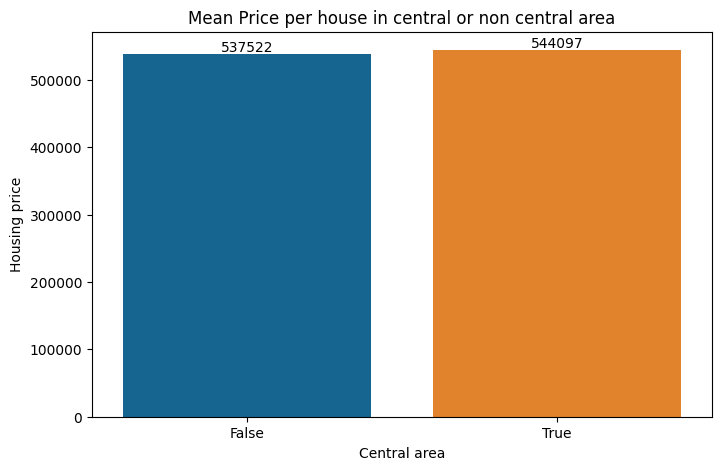

In [1150]:
plot_price_center = sns.barplot(x = 'zipcode_centered', 
                                y = 'price', 
                                data = df_grouped_central)
plot_price_center.set(xlabel='Central area',
       ylabel='Housing price',
       title='Mean Price per house in central or non central area')
plot_price_center.bar_label(plot_price_center.containers[0])

H1 result: there is no great difference between a central house or a house more outside; possible explanation: there are a lot of outliers, and the prices vary a lot, also within the single zipcodes; different explanation: too many zipcodes as cetral

In [1131]:
#df.head()
df[['price', 'zipcode']].sort_values(by='zipcode').tail(20)

,price,zipcode
10956,535000.000,98199
20061,1040000.000,98199
10655,715000.000,98199
13858,640000.000,98199
4224,509500.000,98199
12597,1300000.000,98199
1643,570000.000,98199
15548,730000.000,98199
4214,1880000.000,98199
8322,1660000.000,98199


In [1114]:
df_grouped_zipcode = df.groupby('zipcode').mean().reset_index()
pd.set_option("max_rows", None)
df_grouped_zipcode[['price', 'zipcode', 'zipcode_centered']]
#here we can see in detail, that the fact, if the zipcode is central or not, doesn't seem to matter

,price,zipcode,zipcode_centered
0,281194.870,98001,1.000
1,234284.035,98002,1.000
2,294111.279,98003,1.000
3,1356523.991,98004,1.000
4,810289.696,98005,1.000
5,859938.554,98006,1.000
6,617254.021,98007,1.000
7,645628.226,98008,1.000
8,423665.990,98010,0.000
9,490377.108,98011,0.000


In [1115]:
df_grouped_zipcode[df_grouped_zipcode['zipcode_centered'] == 1.000][['price', 'zipcode']].sort_values('price').reset_index().head(10)
#from the central zipcodes, these are the cheapest ones

,index,price,zipcode
0,1,234284.035,98002
1,20,251296.240,98032
2,0,281194.870,98001
3,13,286742.812,98023
4,2,294111.279,98003
5,18,296187.980,98030
6,19,300340.403,98031
7,30,304262.108,98055
8,26,311580.336,98042
9,40,334921.063,98092


### H2: The square footage effects the price of the houses.

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

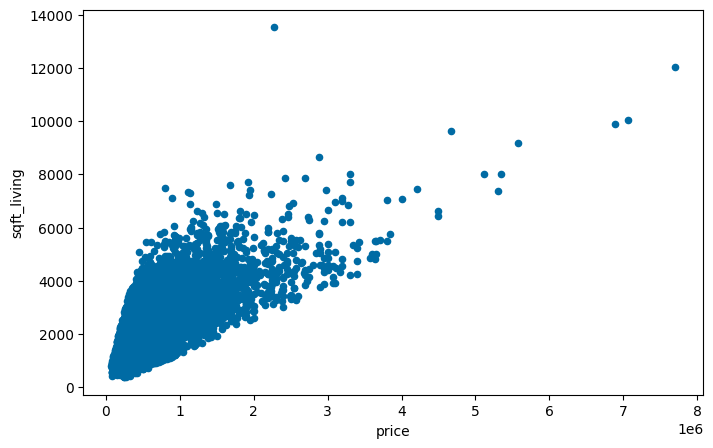

In [1116]:
df.plot(kind='scatter', x='price', y='sqft_living')

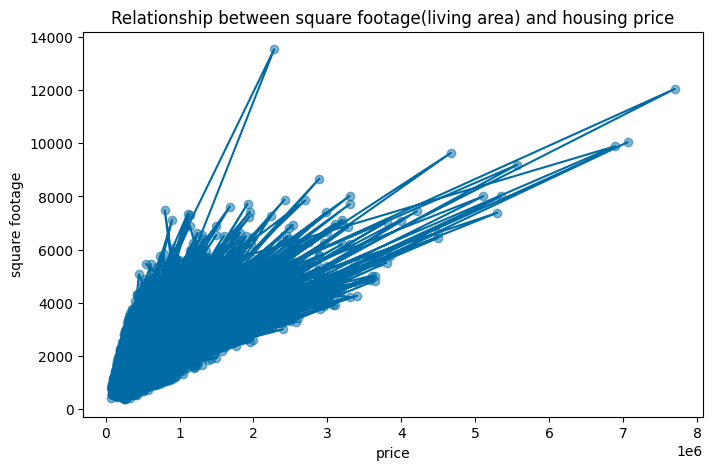

In [1162]:
plt.scatter(df['price'], df['sqft_living'], cmap='Blues', alpha=0.5)

plt.xlabel('price')
plt.ylabel('square footage')
plt.title('Relationship between square footage(living area) and housing price')


plt.show()

[Text(0.5, 0, 'price in million Dollar'),
 Text(0, 0.5, 'square footage'),
 Text(0.5, 1.0, 'Relationship between square footage(living area) and housing price')]

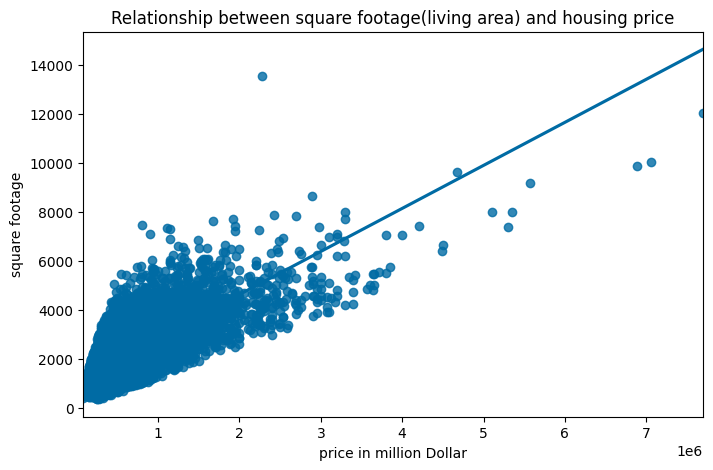

In [1166]:
#plot with regression line
plot_price_sqrfoot = sns.regplot(df['price'], df['sqft_living'], ci=None)
plot_price_sqrfoot.set(xlabel='price in million Dollar', ylabel='square footage',
title='Relationship between square footage(living area) and housing price')


There is a correlation between price and sqft_living.

In [1117]:
#calculating correlations
corr_variables = ['price', 'sqft_living', 'grade', 'condition', 'yr_built']
corr_matrix = df[corr_variables].corr()
corr_matrix

,price,sqft_living,grade,condition,yr_built
price,1.000,0.702,0.668,0.036,0.054
sqft_living,0.702,1.000,0.763,-0.059,0.318
grade,0.668,0.763,1.000,-0.147,0.448
condition,0.036,-0.059,-0.147,1.000,-0.362
yr_built,0.054,0.318,0.448,-0.362,1.000


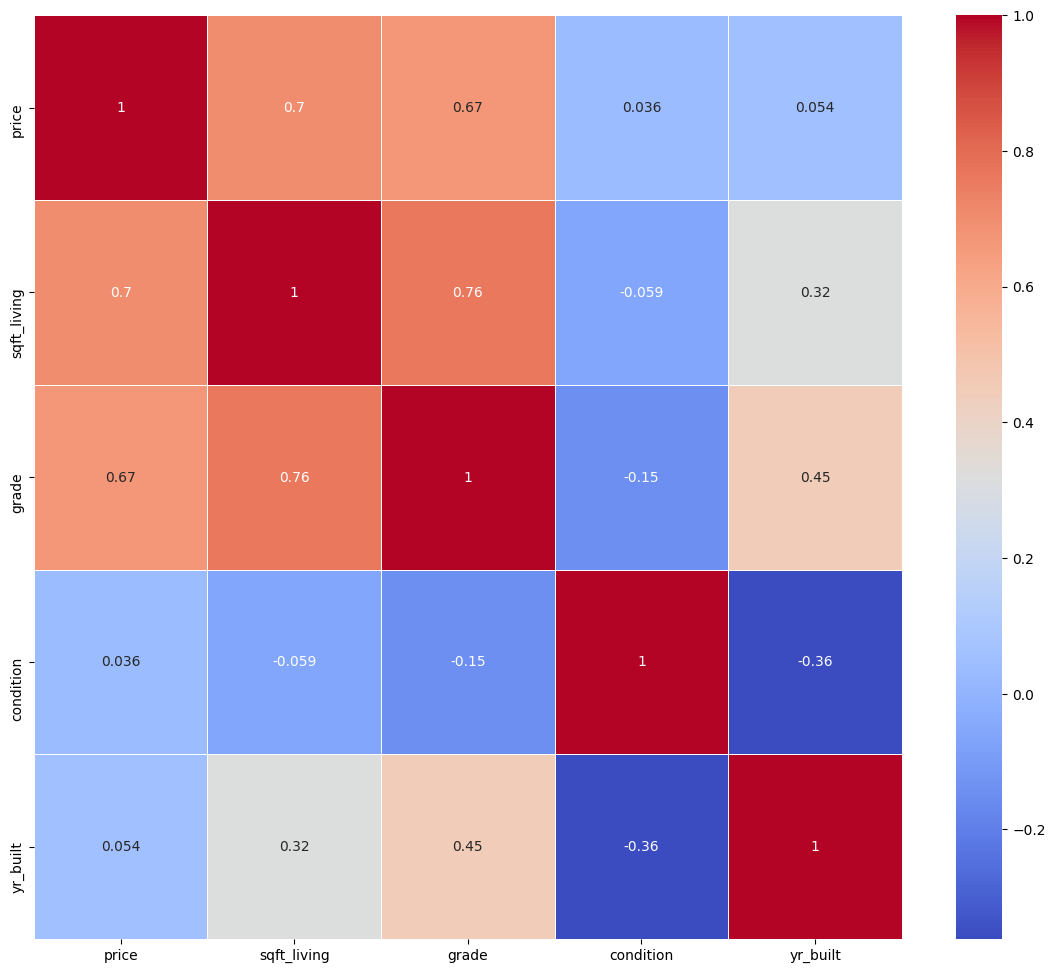

In [1118]:
plt.figure(figsize = (14,12))
ax = sns.heatmap(corr_matrix, linewidths=.5, annot=True, cmap='coolwarm')

From all tested variables, sqft_living has the highest correlation.

### H3: There are certain seasons in the year, where the prices are cheaper.

<AxesSubplot:xlabel='month'>

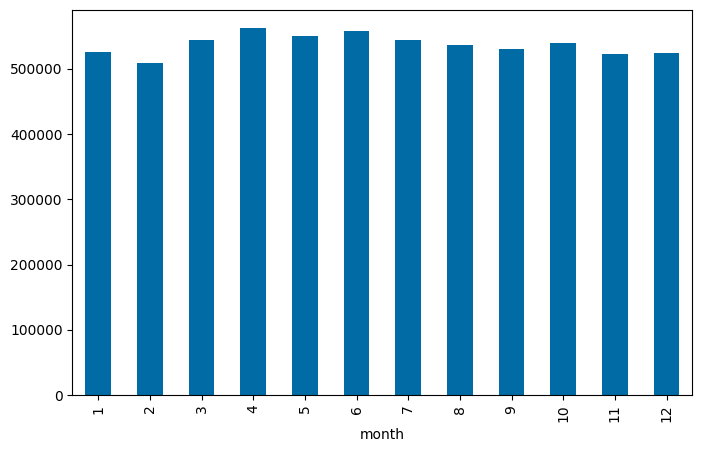

In [1119]:
#df['date_month'] = df['date'].dt.month 
df['month'] = pd.DatetimeIndex(df['date']).month
df_grouped_month = df.groupby('month').mean().reset_index()
df_grouped_month
df_grouped_month.plot(x = "month", y = "price", kind = "bar", legend = False)
#df_grouped_month.head(15)



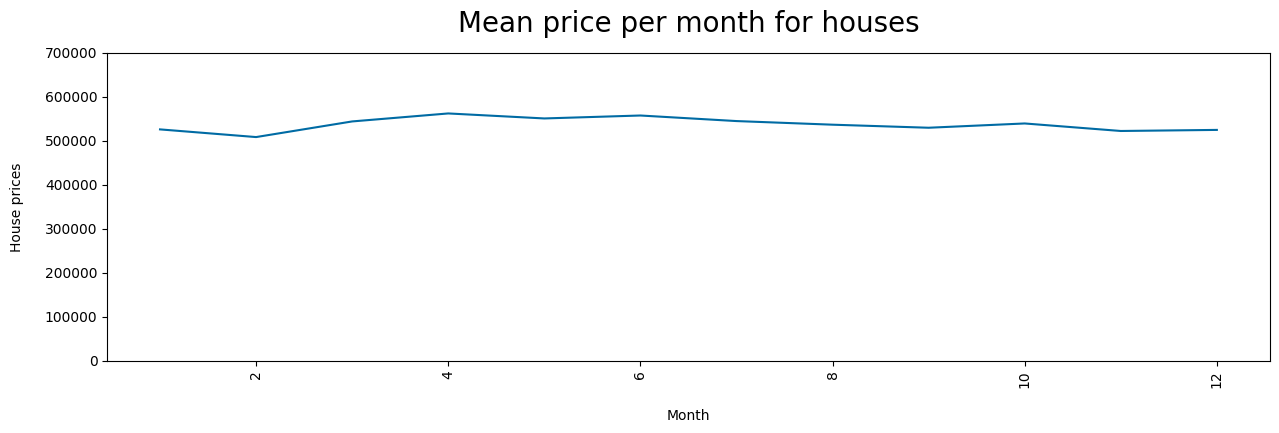

In [1168]:
x = df_grouped_month.month
y = df_grouped_month.price


fig, ax = plt.subplots(figsize =(15,4))
plt.xticks(rotation=90)
plt.title("Mean price per month for houses", fontsize = 20, pad = 15)
plt.ylim(0, 700000)
plt.xlabel("Month", labelpad = 15)
plt.ylabel("House prices", labelpad = 15)

ax.plot(x,y);

In [1167]:
#calculating correlations
corr_variables = ['price', 'sqft_living', 'grade', 'condition', 'yr_built', 'month']
corr_matrix = df[corr_variables].corr()
corr_matrix

,price,sqft_living,grade,condition,yr_built,month
price,1.000,0.702,0.668,0.036,0.054,-0.010
sqft_living,0.702,1.000,0.763,-0.059,0.318,0.012
grade,0.668,0.763,1.000,-0.147,0.448,0.009
condition,0.036,-0.059,-0.147,1.000,-0.362,0.022
yr_built,0.054,0.318,0.448,-0.362,1.000,-0.006
month,-0.010,0.012,0.009,0.022,-0.006,1.000


In [1121]:
# plt.style.use('tableau-colorblind10')
# plt.figure()
# default_x_ticks = range(len('month'))
# plt.bar(df_grouped_month['default_x_ticks'], df_grouped_month['price'])

# #plt.xticks(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
# plt.title("Mean price by central 'yes' oder 'no'")
# plt.xlabel('central')
# plt.ylabel('mean price in ')
# plt.show()

### H4: The newer the house, the higher the price




<AxesSubplot:xlabel='yr_built', ylabel='price'>

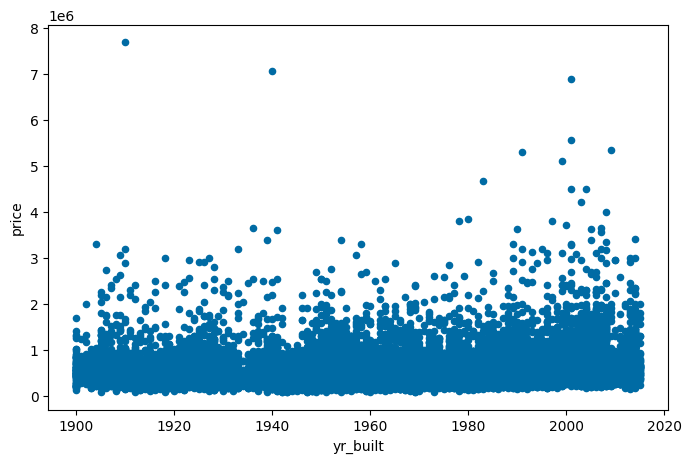

In [1122]:
df.plot(kind='scatter', x='yr_built', y='price')

### now I tried H1 without outliers

In [1152]:
# Calculate the upper limits of the price 
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
#lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
#lower
print(upper)

df_without_outliers = df.query('price < 1027500.0')
df_without_outliers.price.describe() 

1129500.0


count     20180.000
mean     469080.530
std      197830.155
min       78000.000
25%      314990.750
50%      435000.000
75%      595000.000
max     1020000.000
Name: price, dtype: float64

In [1144]:
df_without_outliers.describe()
df_without_outliers = df_without_outliers.groupby('zipcode_centered').mean().reset_index()
df_without_outliers

,zipcode_centered,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
0,False,4557510445.555,477461.545,3.249,1.995,1917.826,15799.210,1.472,0.004,0.210,3.373,7.447,1637.685,1967.172,85.874,98102.377,47.588,-122.223,1861.320,13388.825,6.571
1,True,4680492176.762,457343.919,3.428,2.104,2013.366,12723.278,1.472,0.000,0.098,3.451,7.594,1773.977,1975.709,54.030,98045.310,47.512,-122.200,1977.121,10955.557,6.593


[Text(0, 0, '477462'), Text(0, 0, '457344')]

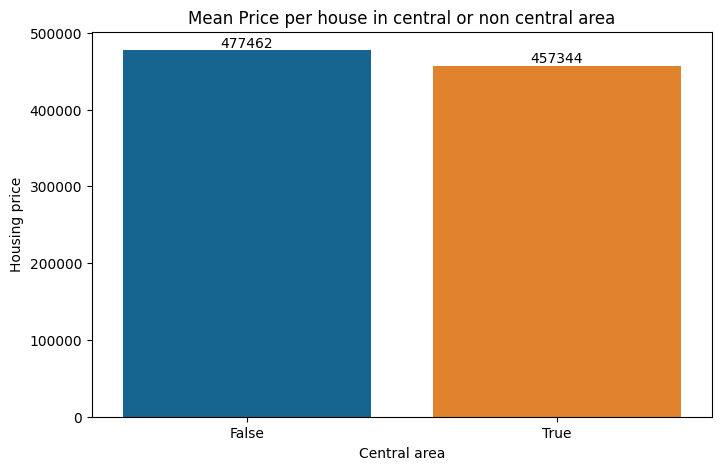

In [1149]:
plot_price_center2 = sns.barplot(x = 'zipcode_centered', 
                                y = 'price', 
                                data = df_without_outliers)
plot_price_center2.set(xlabel='Central area',
                     ylabel='Housing price',
                     title='Mean Price per house in central or non central area')
plot_price_center2.bar_label(plot_price_center2.containers[0])

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

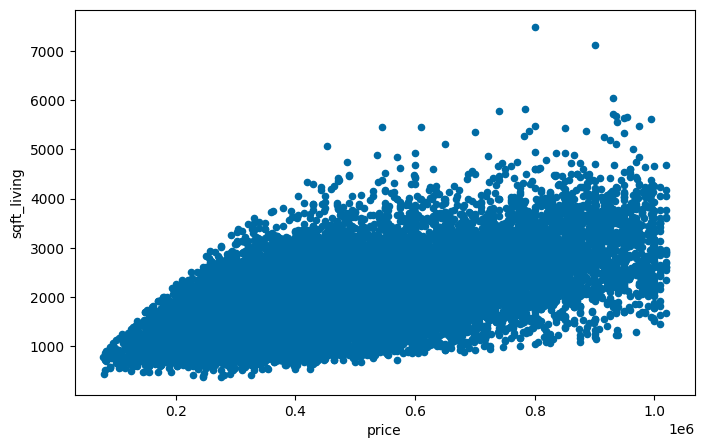

In [1153]:
df_without_outliers.plot(kind='scatter', x='price', y='sqft_living')

In [1154]:
corr_variables = ['price', 'sqft_living', 'grade', 'condition', 'yr_built']
corr_matrix = df_without_outliers[corr_variables].corr()
corr_matrix

,price,sqft_living,grade,condition,yr_built
price,1.000,0.605,0.618,0.034,0.057
sqft_living,0.605,1.000,0.695,-0.076,0.356
grade,0.618,0.695,1.000,-0.175,0.498
condition,0.034,-0.076,-0.175,1.000,-0.352
yr_built,0.057,0.356,0.498,-0.352,1.000


In [1172]:
#filter for zipcode_central with grade from 7, and middle price range up to 595000 (mean price 435000, 75% 595000)
df_without_outliers.grade.value_counts()
df_without_outliers.price.describe()


count     20180.000
mean     469080.530
std      197830.155
min       78000.000
25%      314990.750
50%      435000.000
75%      595000.000
max     1020000.000
Name: price, dtype: float64

### to do
* how to easily round: df_weather['wind'] = df_weather.wind.round(2)
* create a new column square meters
divide the area value by 10,764
by using lambda: # convert temp_min to celsius
df_weather['temp_min'] = df_weather.temp_min.apply(lambda x: (x-32)/1.8)
df_weather.head(5)

# drop columns we don't need
df.drop(["tags","thumbnail_link", "comments_disabled", "ratings_disabled", "video_error_or_removed", "description"], axis=1, inplace=True)

* if I want to calculate the years, how old a house is with yr_built
# create new column called trending_days_difference
df['trending_days_difference']=(df["trending_date"]-df["publish_date"]).dt.days

* create a new variable with only month to have a look, if there is a seasonal difference

* decide what zip code is "center"